# Mario Bros Generate Maps

In [1]:
import numpy as np
from PIL import Image
from IPython.display import display

In [2]:
colors = {}

with open("colors.txt", "r") as f:
    for line in f.readlines():
        k, v = line.split("-")
        colors[eval(k)] = v.replace("\n", "")

In [3]:
blocks_dict = {}
rows = 0
columns = 0
value_length = 0

with open("blocks_dict.txt", "r") as f:
    line = f.readline()
    v, k = line.split("_")
    blocks_dict[k.replace("\n", "")] = v
    value_length = len(v)
        
    for line in f.readlines():
        v, k = line.split("_")
        blocks_dict[k.replace("\n", "")] = v
        
with open("generated.txt", "r") as f:
    line = f.readline().replace("\n", "")
    rows = len(line) // value_length
    columns += 1
    
    for line in f.readlines():
        columns += 1
        
# END and empty line
columns -= 2

In [4]:
block_size = 16
map_ = np.empty((rows, columns), dtype=object)

with open("generated.txt", "r") as f:
    for i, line in enumerate(f.readlines()):
        for t, chain in enumerate(line.split("-")[:-1]):
            chain += "-"
            if t < rows and i < columns:
                map_[t, i] = list(blocks_dict.keys())[list(blocks_dict.values()).index(chain)]

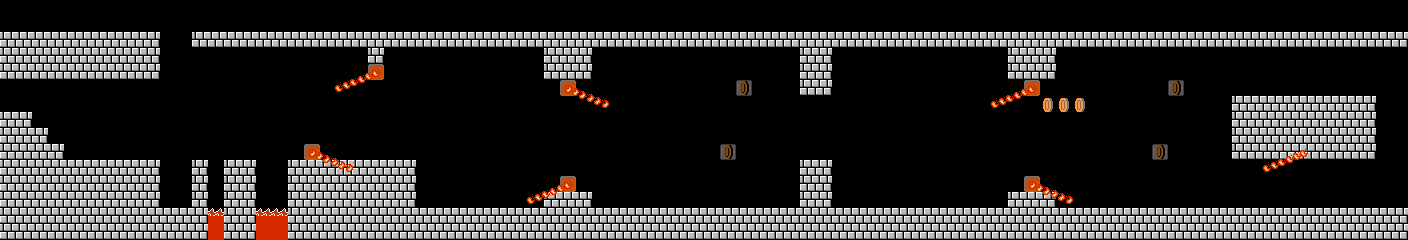

In [5]:
value = np.empty((), dtype=object)
value[()] = (0, 0, 0)
color_map = np.full((rows * block_size, columns * block_size), value, dtype=object)

for i, row in enumerate(map_):
    for t, col in enumerate(row):
        if col != None:
            for c, char in enumerate(col):
                x = c // block_size
                y = c % block_size

                color = list(colors.keys())[list(colors.values()).index(char)]
                color_map[i * block_size + y, t * block_size + x] = color

img = Image.fromarray(np.array(color_map.tolist(), dtype=np.uint8))
display(img)

In [6]:
img.save("generated.png")